# Reinforcement Learning


![](support/agent_env.png)

## Goals of Reinforcement Learning

Extend learning to cover cases where:

* IID assumption does not hold
* Prediction changes real world events
* Try out new things and learn from experience
* Need to stitch together sequence of steps to achieve prespecified goal(s)

### Supervised Learning vs Reinforcement Learning

|Supervised Learning | Reinforcement Learning |
|------------------- |------------------------|
|Input data, predict labels | Input observations, predict actions|
|Minimize loss | Maximize rewards|
|Model is relationship between data and label| Model is relationship between (states, actions) to new (states, rewards)|
|Learn good model | Learn good policy (model, value function are optional)

## Reinforcement Learning Components


### Concepts

Agent: Plan and act in an environment. 
* achive a desired goal or maximize reward.

Environment: Context where the agent lives. 
* Provide an agent with observations
* accept an agent action
* change based on the agent action.

### Sets

State: Snapshot that completely specifies the environment at a point in time. 

* The set of all possible space is the state space. Can be discrete or continuous

Observation: Agents perception of the environment

* May be incomplete and/or noisy versions of the state

Action: How the agents interacts to change the environment. 

* Set of all possible actions is the action space. Can also be discrete or continuous

### Functions

Model: A function that specifies the environment dynamics
* Given a current state and an action, returns new state
* Sometimes returns other information and the reward

Reward: A function that specifies what the return is on an agents action.
* Given a current state and an action, returns the reward.

## Environments

In [2]:
import gym
env = gym.make('CartPole-v0')

print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Box(4,)
action space: Discrete(2)


In [3]:
observation = env.reset()
print(observation)

[ 0.0191488  -0.0122565   0.01730884 -0.03437213]


In [4]:
action = env.action_space.sample()
print(action)

0


In [5]:
for _ in range(100):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break

![](support/cartpole1.gif)

In [ ]:
env = gym.make('FrozenLake-v0')
env.reset()
env.render()

https://gym.openai.com/envs/

## RL Formalization: Markov Decision Process

Markov decision process is a 4-tuple $(S,A,P_{a},r_{a})$, where
* $S$ : a finite set of states,
* $A$ : a finite set of actions
* $P_{a}(s,s') = \Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)$: probability that action $a$ in state $s$ leads to state $s'$
* $r_{a}(s,s')$: the immediate reward received after transitioning from state $s$ to state $s'$, due to action $a$

![](support/mdp.png)

![](support/trajectories.png)

### Defining the Objective

Find policy $\pi(s)$ that maximizes total returns for an episode

Define Return **$R_t$** as the sum of discounted rewards

$$ R_t = r_t + \gamma r_{t+1} + \gamma r_{t+2} + \gamma r_{t+3} + ... = \sum_{k=0}^\infty \gamma^k r_{t+k}$$

Return at t = 0, equals total expected at initial state

### Solving the MDP

If all of $(S,A,P_{a},r_{a})$ are known we can solve the MDP to compute the policy $\pi(s)$. 

There are two approaches

* **Value Iteration**: Define the value and use dynamic programming or other techniques to solve
 * Incrementally update value function  
 
 $V_{i+1}(s) := \max_a \left\{ \sum_{s'} P_a(s,s') \left( r_a(s,s') + \gamma V_i(s') \right) \right\}$
 

* **Policy Iteration** :
 *  For each value update incrementally update policy function until convergence
 
 $V(s) := \sum_{s'} P_{\pi(s)} (s,s') \left( r_{\pi(s)} (s,s') + \gamma V(s') \right) $
 
 $\pi (s):=argmax_{a}\left\{\sum _{s'}P(s'\mid s,a)\left(R(s'\mid s,a)+\gamma V(s')\right)\right\}$

In Reinforcement Learning, things are not so easy because often we don't know the $P$ and or $r$.


### Reinforcement Learning Approaches

 * **Model Based**: Learn transition model or dynamics of environment first

 * **Model Free** : Don't attempt to learn model or dynamics. Learn by exploration.
  * Learn **Q function**, generalization of value function. More on this later
  * Learn **policy** directly

### Balancing Exploration and Exploitation

 * **Greedy**: always take greedy action	

 * **$\epsilon$-greedy** : with probability 𝜖 take random action otherwise take greedy action


## Agents


![](support/algorithm_taxonomy.png)

### Computational Intractability

For Games of perfect information like Chess or GO. We know the model (dynamics of the environment).

Theoretically, we should be able to compute the optimal value function.

Practically, for any non-trivial game the amount moves needed to compute this is roughly $b^d$.

For chess: $35^{80}$

Number of particles in the universe: $10^{86}$

### Deep Reinforcement Learning and Function Approximation

When state space is large, use Deep Neural Networks to approximate key functions in Reinforcement Learning

 * **Model Based**:
  * Approximate **Value** function and/or **Policy** function with neural net

 * **Model Free** : 
  * Q-Learning: Approximate **Q function** with neural network
  * Policy Optimization: Approximate **policy** with neural network

### 'Model' Based Deep RL
Examples:
* AlphaGo
* AlphaGo Zero
* AlphaZero

Combine Neural Networks for $V$ and $\pi$ approximation with Neural Networks

### Model Free Agents

* **Q-Learning**: Learn Q function
 * Learn the value of taking an action from a given state.
	‘Q-Value’ is the expected return after taking the action.
    

* **Policy Optimization**: Learn policy directly
 * Learn the action to take from a given state (i.e. observations).
	We call the model for this the policy, denoted 𝜋_𝜃 (𝑎|𝑠).


### Q-Learning

Define Q function:
$$ 𝑄^{\pi}_(s,a) = \mathtt{E}_{\pi} [R_t |s,a] $$
$$ 𝑄^∗(s,a) = max_{\pi}⁡ 𝑄^{\pi} (s,a)$$

### DQN: Deep Q Network 

* Approximate Q function with Neural Net
* Uses ‘experience replay‘
* Uses a ‘target’ network

![](support/dqn.png)


### Policy Gradients

Objective: $$ J(\theta) = v_{\pi_\theta } (s_0)$$

Gradient : $$ \nabla J(\theta) = R_t  \dfrac{\nabla_{\pi_\theta} (a_t│s)}{\pi_\theta (a_t│s)} = R_t(\nabla log{\pi_\theta}(a_t│s))$$

Gradient ascent: $$ \theta_{t+1}←\theta_t + \alpha \nabla J(\theta) $$
$$ \theta_{t+1}←\theta_t + \alpha R_t(\nabla log{\pi_\theta}(a_t│s)) $$

### Policy Optimization 
![](support/policy_gradients.png)

### PPO: Proximal Policy Optimization
Relative Improvement:
$$r_t (\theta)= \dfrac{\pi_\theta (a_t |s_t)}{\pi_{\theta_{old}} (a_t |s_t)}$$

PPO Objective: 

$$ max_{\theta}⁡\mathtt{E}_t [min(r_t (\theta) A_t, 𝑐𝑙𝑖𝑝(r_t (\theta), 1−\epsilon, 1+\epsilon) 𝐴_t)]$$

https://nervanasystems.github.io/coach/

# Train and Deploy with SageMaker RL

![](support/sagemaker_rl.png)

## Portfolio Management with Amazon SageMaker RL

**RL Toolkit** : Coach

**DL Framework** : MXNet

**RL Environment**: OpenAIGym

## Problem Statement

We start with $m$ preselected stocks. Without loss of generality, the total investment value is set as 1 dollar at the initial timestamp. At timestamp $t$, letting $v_{m,t}$ denote the closing price of stock $m$, the *price relative vector* is defined as 
$$ y_t = ( 1, \frac{v_{1,t}}{v_{1,t-1}}, \frac{v_{2,t}}{v_{2,t-1}}, \dots, \frac{v_{m,t}}{v_{m,t-1}} ). $$
The first element corresponds to the cash we maintain. The cash value doesn't change along time so it is always 1. During training, the investment redistribution at step $t$ is characterized by the portfolio weight vector $\mathbf{\omega} = (\omega_{0,t}, \omega_{1,t}, \dots, \omega_{m,t})$. 

1. *Objective:*
The portfolio consists of a group of stocks. We aim to maximize the portfolio value by adjusting the weights of each stock and reallocating the portfolio at the end of each day.

2. *Environment:*
Custom developed environment using Gym.

3. *States:*
Portfolio weight vector from last trading day $\omega_{t-1}$. Historic price tensor constructed using close, open, high, low prices of each stock. For more details, please refer to [1].

4. *Actions:*
New weight vector $\omega_{t}$ satisfying $\sum_{i=0}^{m}\omega_{i,t}=1$.

5. *Reward:* 
Average logarithmic cumulated return. Consider a trading cost factor $\mu$, the average logarithmic cumulated return after timestamp $T$ is $$ R := \frac{1}{T} \sum_{t=1}^{T+1} \ln(\mu_{t}y_{t}\cdot\omega_{t-1}).$$
We use the maximum rate at Poloniex and set $\mu=0.25\%$.

## Dataset

In this notebook, we use the dataset generated by [Chi Zhang](https://github.com/vermouth1992/drl-portfolio-management/tree/master/src/utils/datasets). It contains the historic price of 16 target stocks from NASDAQ100, including open, close, high and low prices from 2012-08-13 to 2017-08-11. Specifically, those stocks are: “AAPL”, “ATVI”, “CMCSA”, “COST”, “CSX”, “DISH”, “EA”, “EBAY”, “FB”, “GOOGL”, “HAS”, “ILMN”, “INTC”, “MAR”, “REGN” and “SBUX”.

## Prerequisites

In [9]:
import sagemaker
import boto3
import sys
import os
import glob
import re
import subprocess
from IPython.display import HTML
import time
from time import gmtime, strftime
sys.path.append("common")
from misc import get_execution_role, wait_for_s3_object
from sagemaker.rl import RLEstimator, RLToolkit, RLFramework

sage_session = sagemaker.session.Session()
s3_bucket = sage_session.default_bucket()  
s3_output_path = 's3://{}/'.format(s3_bucket)
print("S3 bucket path: {}".format(s3_output_path))
job_name_prefix = 'rl-portfolio-management'
role = sagemaker.get_execution_role()

S3 bucket path: s3://sagemaker-us-east-1-412868550678/


## Environment

Custom environment built on Open AI gym

In [10]:
!pygmentize src/portfolio_env.py

"""
Modified from https://github.com/vermouth1992/drl-portfolio-management/blob/master/src/environment/portfolio.py
"""
import gym
import gym.spaces
from pprint import pprint
import numpy as np
from utils import *
import csv
from config import *


class PortfolioEnv(gym.Env):
    """
    An environment for financial portfolio management.
    Financial portfolio management is the process of constant redistribution of a fund into different
    financial products.
    Based on [Jiang 2017](https://arxiv.org/abs/1706.10059)
    """

    def __init__(self,
                 steps=730,  # 2 years
                 trading_cost=0.0025,
                 time_cost=0.00,
                 window_length=7,
                 start_idx=0,
                 sample_start_date=None
                 ):
        """
        An environment for financial portfolio management.
        Params:
            steps - steps in episode
            scale - scale data and each episode (except return)
            augment 

## Agent and Algorithm

Clipped PPO Agent with Coach


In [11]:
!pygmentize src/preset-portfolio-management-clippedppo.py

from rl_coach.agents.clipped_ppo_agent import ClippedPPOAgentParameters
from rl_coach.architectures.layers import Dense, Conv2d
from rl_coach.base_parameters import VisualizationParameters, PresetValidationParameters
from rl_coach.base_parameters import MiddlewareScheme, DistributedCoachSynchronizationType
from rl_coach.core_types import TrainingSteps, EnvironmentEpisodes, EnvironmentSteps, RunPhase
from rl_coach.environments.gym_environment import GymVectorEnvironment, ObservationSpaceType
from rl_coach.exploration_policies.e_greedy import EGreedyParameters
from rl_coach.graph_managers.basic_rl_graph_manager import BasicRLGraphManager
from rl_coach.graph_managers.graph_manager import ScheduleParameters
from rl_coach.schedules import LinearSchedule

####################
# Graph Scheduling #
####################

schedule_params = ScheduleParameters()
schedule_params.improve_steps = TrainingSteps(60000)
schedule_params.steps_between_evaluation_periods = EnvironmentSteps(2048)
schedule_p

## Training Code

SageMakerRL prebuilt functions to training coach agents

In [12]:
!pygmentize src/train-coach.py

from sagemaker_rl.coach_launcher import SageMakerCoachPresetLauncher


class MyLauncher(SageMakerCoachPresetLauncher):

    def default_preset_name(self):
        """This points to a .py file that configures everything about the RL job.
        It can be overridden at runtime by specifying the RLCOACH_PRESET hyperparameter.
        """
        return 'preset-portfolio-management-clippedppo'

    def map_hyperparameter(self, name, value):
        """Here we configure some shortcut names for hyperparameters that we expect to use frequently.
        Essentially anything in the preset file can be overridden through a hyperparameter with a name
        like "rl.agent_params.algorithm.etc".
        """
        # maps from alias (key) to fully qualified coach parameter (value)
        mapping = {
            "discount": "rl.agent_params.algorithm.discount",
            "evaluation_episodes": "rl.evaluation_steps:EnvironmentEpisodes",
            "improve_steps": "rl.improve_steps:TrainingStep

## Model Training
Create SageMaker RL Estimator

In [ ]:
instance_type = "ml.m4.4xlarge"
estimator = RLEstimator(source_dir='src',
                      entry_point="train-coach.py",
                      dependencies=["common/sagemaker_rl"],
                      toolkit=RLToolkit.COACH,
                      toolkit_version='0.11.0',
                      framework=RLFramework.MXNET,
                      role=role,
                      train_instance_count=1,
                      train_instance_type=instance_type,
                      output_path=s3_output_path,
                      base_job_name=job_name_prefix,
                      hyperparameters = {
                          "RLCOACH_PRESET" : "preset-portfolio-management-clippedppo",
                          "rl.agent_params.algorithm.discount": 0.9,
                          "rl.evaluation_steps:EnvironmentEpisodes": 5
                      }
                    )
# takes ~15min
# The log may show KL divergence=[0.]. This is expected because the divergences were not necessarily required for 
# Clipped PPO. By default they are not calculated for computational efficiency.
estimator.fit()

2019-06-12 21:36:04 Starting - Starting the training job...
2019-06-12 21:36:05 Starting - Launching requested ML instances......
2019-06-12 21:37:14 Starting - Preparing the instances for training......
2019-06-12 21:38:35 Downloading - Downloading input data
2019-06-12 21:38:35 Training - Training image download completed. Training in progress..
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2019-06-12 21:38:36,849 sagemaker-containers INFO     Imported framework sagemaker_mxnet_container.training
2019-06-12 21:38:36,852 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2019-06-12 21:38:36,867 sagemaker_mxnet_container.training INFO     MXNet training environment: {'SM_MODEL_DIR': '/opt/ml/model', 'SM_HPS': '{"RLCOACH_PRESET":"preset-portfolio-management-clippedppo","rl.agent_params.algorithm.discount":0.9,"rl.evaluation_steps:EnvironmentEpisodes":5}', 'SM_NUM_GPUS': '0', 'SM_FRAMEWORK_PARAMS'

#033Warning: failed to import the following packages - tensorflow#033
Applying RL hyperparameter rl.agent_params.algorithm.discount=0.9
Applying RL hyperparameter rl.evaluation_steps:EnvironmentEpisodes=5
Loading preset preset-portfolio-management-clippedppo from /opt/ml/code
## Creating graph - name: BasicRLGraphManager
/usr/local/lib/python3.5/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
## Creating agent - name: agent
Requested devices [gpu(0)] not available. Default to CPU context.
Requested devices [gpu(0)] not available. Default to CPU context.
/usr/local/lib/python3.5/dist-packages/mxnet/gluon/block.py:303: UserWarning: "PPOHead._loss" is an unregistered container with Blocks. Note that Blocks inside the list, tuple or dict will not be registered automatically. Make sure to register them using register_child() or switching to nn.Sequential/n

Training> Name=main_level/agent, Worker=0, Episode=7, Total reward=-3.09, Steps=6875, Training iteration=2
Policy training> Surrogate loss=0.012804467231035233, KL divergence=[0.], Entropy=[-0.24119559], training epoch=0, learning_rate=0.0001
Policy training> Surrogate loss=-0.009861736558377743, KL divergence=[0.], Entropy=[-0.24115314], training epoch=1, learning_rate=0.0001
Policy training> Surrogate loss=-4.4948676077183336e-05, KL divergence=[0.], Entropy=[-0.24111661], training epoch=2, learning_rate=0.0001
Policy training> Surrogate loss=-0.014691334217786789, KL divergence=[0.], Entropy=[-0.24107386], training epoch=3, learning_rate=0.0001
Policy training> Surrogate loss=-0.0104815773665905, KL divergence=[0.], Entropy=[-0.2410608], training epoch=4, learning_rate=0.0001
Policy training> Surrogate loss=-0.011535034514963627, KL divergence=[0.], Entropy=[-0.24104196], training epoch=5, learning_rate=0.0001
Policy training> Surrogate loss=-0.014787916094064713, KL divergence=[0.]

Testing> Name=main_level/agent, Worker=0, Episode=14, Total reward=-0.23, Steps=14336, Training iteration=6
Testing> Name=main_level/agent, Worker=0, Episode=14, Total reward=-0.36, Steps=14336, Training iteration=6
Testing> Name=main_level/agent, Worker=0, Episode=14, Total reward=-0.26, Steps=14336, Training iteration=6
Testing> Name=main_level/agent, Worker=0, Episode=14, Total reward=-0.8, Steps=14336, Training iteration=6
## agent: Finished evaluation phase. Success rate = 0.0, Avg Total Reward = -0.31
Checkpoint> Saving in path=['/opt/ml/output/data/checkpoint/7_Step-14337.ckpt.main_level.agent.main.online']
Training> Name=main_level/agent, Worker=0, Episode=15, Total reward=-3.18, Steps=15067, Training iteration=6
Policy training> Surrogate loss=0.03454485535621643, KL divergence=[0.], Entropy=[-0.24149895], training epoch=0, learning_rate=0.0001
Policy training> Surrogate loss=0.024196533486247063, KL divergence=[0.], Entropy=[-0.24148323], training epoch=1, learning_rate=0.000

Training> Name=main_level/agent, Worker=0, Episode=21, Total reward=-2.52, Steps=21211, Training iteration=9
Policy training> Surrogate loss=0.027602344751358032, KL divergence=[0.], Entropy=[-0.24163772], training epoch=0, learning_rate=0.0001
Policy training> Surrogate loss=0.015934176743030548, KL divergence=[0.], Entropy=[-0.24164781], training epoch=1, learning_rate=0.0001
Policy training> Surrogate loss=0.02160494402050972, KL divergence=[0.], Entropy=[-0.24166478], training epoch=2, learning_rate=0.0001
Policy training> Surrogate loss=0.032186370342969894, KL divergence=[0.], Entropy=[-0.24170828], training epoch=3, learning_rate=0.0001
Policy training> Surrogate loss=0.018780214712023735, KL divergence=[0.], Entropy=[-0.24175169], training epoch=4, learning_rate=0.0001
Policy training> Surrogate loss=0.01406117994338274, KL divergence=[0.], Entropy=[-0.24176231], training epoch=5, learning_rate=0.0001
Policy training> Surrogate loss=0.03400639072060585, KL divergence=[0.], Entr

Testing> Name=main_level/agent, Worker=0, Episode=28, Total reward=-0.66, Steps=28672, Training iteration=13
Testing> Name=main_level/agent, Worker=0, Episode=28, Total reward=-0.88, Steps=28672, Training iteration=13
Testing> Name=main_level/agent, Worker=0, Episode=28, Total reward=0.05, Steps=28672, Training iteration=13
Testing> Name=main_level/agent, Worker=0, Episode=28, Total reward=-0.24, Steps=28672, Training iteration=13
## agent: Finished evaluation phase. Success rate = 0.0, Avg Total Reward = -0.44
Checkpoint> Saving in path=['/opt/ml/output/data/checkpoint/14_Step-28673.ckpt.main_level.agent.main.online']
Training> Name=main_level/agent, Worker=0, Episode=29, Total reward=-3.11, Steps=29403, Training iteration=13
Policy training> Surrogate loss=0.04617445170879364, KL divergence=[0.], Entropy=[-0.24201241], training epoch=0, learning_rate=0.0001
Policy training> Surrogate loss=0.04286491125822067, KL divergence=[0.], Entropy=[-0.24204049], training epoch=1, learning_rate=

Policy training> Surrogate loss=0.02929091267287731, KL divergence=[0.], Entropy=[-0.24243107], training epoch=1, learning_rate=0.0001
Policy training> Surrogate loss=0.0258175116032362, KL divergence=[0.], Entropy=[-0.242452], training epoch=2, learning_rate=0.0001
Policy training> Surrogate loss=0.03124210424721241, KL divergence=[0.], Entropy=[-0.24247576], training epoch=3, learning_rate=0.0001
Policy training> Surrogate loss=0.02461860328912735, KL divergence=[0.], Entropy=[-0.24249396], training epoch=4, learning_rate=0.0001
Policy training> Surrogate loss=0.01864749938249588, KL divergence=[0.], Entropy=[-0.24249868], training epoch=5, learning_rate=0.0001
Policy training> Surrogate loss=0.019830407574772835, KL divergence=[0.], Entropy=[-0.24250741], training epoch=6, learning_rate=0.0001
Policy training> Surrogate loss=0.02987232804298401, KL divergence=[0.], Entropy=[-0.24253355], training epoch=7, learning_rate=0.0001
Policy training> Surrogate loss=0.02735915593802929, KL d

## agent: Starting evaluation phase
Testing> Name=main_level/agent, Worker=0, Episode=42, Total reward=-0.52, Steps=43008, Training iteration=20
Testing> Name=main_level/agent, Worker=0, Episode=42, Total reward=-0.5, Steps=43008, Training iteration=20
Testing> Name=main_level/agent, Worker=0, Episode=42, Total reward=-0.12, Steps=43008, Training iteration=20
Testing> Name=main_level/agent, Worker=0, Episode=42, Total reward=-0.1, Steps=43008, Training iteration=20
Testing> Name=main_level/agent, Worker=0, Episode=42, Total reward=-0.23, Steps=43008, Training iteration=20
## agent: Finished evaluation phase. Success rate = 0.0, Avg Total Reward = -0.29
Checkpoint> Saving in path=['/opt/ml/output/data/checkpoint/22_Step-43009.ckpt.main_level.agent.main.online']
Training> Name=main_level/agent, Worker=0, Episode=43, Total reward=-2.98, Steps=43739, Training iteration=20
Policy training> Surrogate loss=0.028742752969264984, KL divergence=[0.], Entropy=[-0.24304293], training epoch=0, lear

Policy training> Surrogate loss=0.04346982389688492, KL divergence=[0.], Entropy=[-0.24362893], training epoch=1, learning_rate=0.0001
Policy training> Surrogate loss=0.04147516191005707, KL divergence=[0.], Entropy=[-0.24366535], training epoch=2, learning_rate=0.0001
Policy training> Surrogate loss=0.01816238835453987, KL divergence=[0.], Entropy=[-0.24369612], training epoch=3, learning_rate=0.0001
Policy training> Surrogate loss=0.022480951622128487, KL divergence=[0.], Entropy=[-0.24372528], training epoch=4, learning_rate=0.0001
Policy training> Surrogate loss=0.03072584792971611, KL divergence=[0.], Entropy=[-0.24375315], training epoch=5, learning_rate=0.0001
Policy training> Surrogate loss=0.017373325303196907, KL divergence=[0.], Entropy=[-0.24378549], training epoch=6, learning_rate=0.0001
Policy training> Surrogate loss=0.019901566207408905, KL divergence=[0.], Entropy=[-0.24382019], training epoch=7, learning_rate=0.0001
Policy training> Surrogate loss=0.02278904803097248,

## agent: Starting evaluation phase
Testing> Name=main_level/agent, Worker=0, Episode=56, Total reward=0.04, Steps=57344, Training iteration=27
Testing> Name=main_level/agent, Worker=0, Episode=56, Total reward=-0.06, Steps=57344, Training iteration=27
Testing> Name=main_level/agent, Worker=0, Episode=56, Total reward=-0.59, Steps=57344, Training iteration=27
Testing> Name=main_level/agent, Worker=0, Episode=56, Total reward=-0.44, Steps=57344, Training iteration=27
Testing> Name=main_level/agent, Worker=0, Episode=56, Total reward=-0.74, Steps=57344, Training iteration=27
## agent: Finished evaluation phase. Success rate = 0.0, Avg Total Reward = -0.36
Checkpoint> Saving in path=['/opt/ml/output/data/checkpoint/29_Step-57345.ckpt.main_level.agent.main.online']
Training> Name=main_level/agent, Worker=0, Episode=57, Total reward=-2.89, Steps=58075, Training iteration=27
Policy training> Surrogate loss=0.034931521862745285, KL divergence=[0.], Entropy=[-0.24430871], training epoch=0, lea

## Get Training Results

In [18]:
job_name=estimator._current_job_name
print("Job name: {}".format(job_name))

s3_url = "s3://{}/{}".format(s3_bucket,job_name)
output_tar_key = "{}/output/output.tar.gz".format(job_name)

intermediate_folder_key = "{}/output/intermediate/".format(job_name)
output_url = "s3://{}/{}".format(s3_bucket, output_tar_key)
intermediate_url = "s3://{}/{}".format(s3_bucket, intermediate_folder_key)

print("S3 job path: {}".format(s3_url))
print("Output.tar.gz location: {}".format(output_url))
print("Intermediate folder path: {}".format(intermediate_url))
    
tmp_dir = "/tmp/{}".format(job_name)
os.system("mkdir {}".format(tmp_dir))
print("Create local folder {}".format(tmp_dir))

Job name: rl-portfolio-management-2019-06-12-21-36-03-778
S3 job path: s3://sagemaker-us-east-1-412868550678/rl-portfolio-management-2019-06-12-21-36-03-778
Output.tar.gz location: s3://sagemaker-us-east-1-412868550678/rl-portfolio-management-2019-06-12-21-36-03-778/output/output.tar.gz
Intermediate folder path: s3://sagemaker-us-east-1-412868550678/rl-portfolio-management-2019-06-12-21-36-03-778/output/intermediate/
Create local folder /tmp/rl-portfolio-management-2019-06-12-21-36-03-778


In [19]:
%%time

wait_for_s3_object(s3_bucket, output_tar_key, tmp_dir)  

if not os.path.isfile("{}/output.tar.gz".format(tmp_dir)):
    raise FileNotFoundError("File output.tar.gz not found")
os.system("tar -xvzf {}/output.tar.gz -C {}".format(tmp_dir, tmp_dir))
os.system("aws s3 cp --recursive {} {}".format(intermediate_url, tmp_dir))
if not os.path.isfile("{}/output.tar.gz".format(tmp_dir)):
    raise FileNotFoundError("File output.tar.gz not found")
os.system("tar -xvzf {}/output.tar.gz -C {}".format(tmp_dir, tmp_dir))
print("Copied output files to {}".format(tmp_dir))

checkpoint_dir = "{}/checkpoint".format(tmp_dir)
info_dir = "{}/".format(tmp_dir)

print("Checkpoint directory {}".format(checkpoint_dir))
print("info directory {}".format(info_dir))

Waiting for s3://sagemaker-us-east-1-412868550678/rl-portfolio-management-2019-06-12-21-36-03-778/output/output.tar.gz...
Copied output files to /tmp/rl-portfolio-management-2019-06-12-21-36-03-778
Checkpoint directory /tmp/rl-portfolio-management-2019-06-12-21-36-03-778/checkpoint
info directory /tmp/rl-portfolio-management-2019-06-12-21-36-03-778/
CPU times: user 141 ms, sys: 28.7 ms, total: 170 ms
Wall time: 1.16 s


## Visualize

Waiting for s3://sagemaker-us-east-1-412868550678/rl-portfolio-management-2019-06-12-21-36-03-778/output/intermediate/worker_0.simple_rl_graph.main_level.main_level.agent_0.csv...


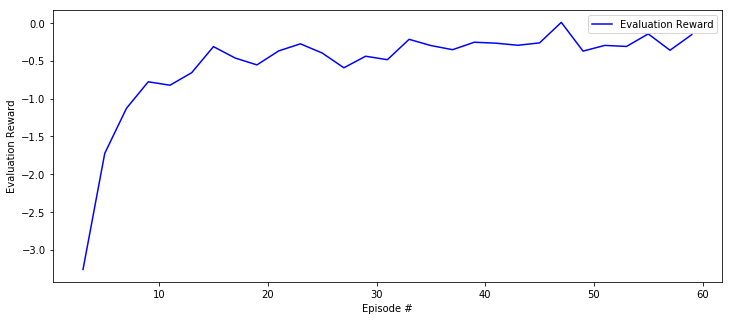

In [20]:
%matplotlib inline
import pandas as pd

csv_file_name = "worker_0.simple_rl_graph.main_level.main_level.agent_0.csv"
key = os.path.join(intermediate_folder_key, csv_file_name)
wait_for_s3_object(s3_bucket, key, tmp_dir)

csv_file = "{}/{}".format(tmp_dir, csv_file_name)
df = pd.read_csv(csv_file)
df = df.dropna(subset=['Evaluation Reward'])
# print(list(df))
x_axis = 'Episode #'
y_axis = 'Evaluation Reward'

plt = df.plot(x=x_axis,y=y_axis, figsize=(12,5), legend=True, style='b-')
plt.set_ylabel(y_axis);
plt.set_xlabel(x_axis);

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


<Figure size 432x288 with 0 Axes>

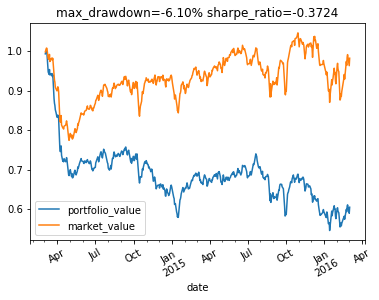

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# same as in https://github.com/vermouth1992/drl-portfolio-management/blob/master/src/environment/portfolio.py
def sharpe(returns, freq=30, rfr=0):
    """ Given a set of returns, calculates naive (rfr=0) sharpe. """
    eps = np.finfo(np.float32).eps
    return (np.sqrt(freq) * np.mean(returns - rfr + eps)) / np.std(returns - rfr + eps)


def max_drawdown(returns):
    """ Max drawdown. See https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp """
    eps = np.finfo(np.float32).eps
    peak = returns.max()
    trough = returns[returns.argmax():].min()
    return (trough - peak) / (peak + eps)

info = info_dir + 'portfolio-management.csv'
df_info = pd.read_csv(info)
df_info['date'] = pd.to_datetime(df_info['date'], format='%Y-%m-%d')
df_info.set_index('date', inplace=True)
mdd = max_drawdown(df_info.rate_of_return + 1)
sharpe_ratio = sharpe(df_info.rate_of_return)
title = 'max_drawdown={: 2.2%} sharpe_ratio={: 2.4f}'.format(mdd, sharpe_ratio)
df_info[["portfolio_value", "market_value"]].plot(title=title, fig=plt.gcf(), rot=30)